# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 



В работе будет произведено исследование данных сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
 
Основная задача: выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
   
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 
Ход работы:

Данные о продаже недвижимость содержатс в файле: /datasets/real_estate_data.csv. О качестве данных информации нет, поэтому первым шагом в исследовании будет обзор данных.
    
Необходимо выполнить проверку данных на пропуски, ошибки, аномалии и затем выполнить их предобработку.
    
Далее будет выполнен расчет дополнительных параметров и добавлених их в таблицу.
Затем можно приступать к исследованию.

Таким образом, иследование будет проведено в пять этапов:
1. Обзор данных
2. Предобработка данных
3. Выполнение дополнительных расчетов и добавление их в таблицу
4. Исследовательский анализ
5. Общий вывод



### Откройте файл с данными и изучите общую информацию. 

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

Изучим таблицу, отобразив первые 10 строк

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### 

1. first_day_exposition — дата публикации. Столбец необходимо перевести в формат date
2. is_apartment — апартаменты. Необходимо перевести в булевый тип
3. balcony — число балконов. Необходимо изменить на целочисленный тип, так как указано число балконов, а не их площадь
4. parks_around3000 — число парков в радиусе 3 км. Необходимо изменить на целочисленный тип
5. ponds_around3000 — число водоёмов в радиусе 3 км. Необходимо изменить на целочисленный тип
6. days_exposition — сколько дней было размещено объявление (от публикации до снятия). Необходимо изменить на целочисленный тип

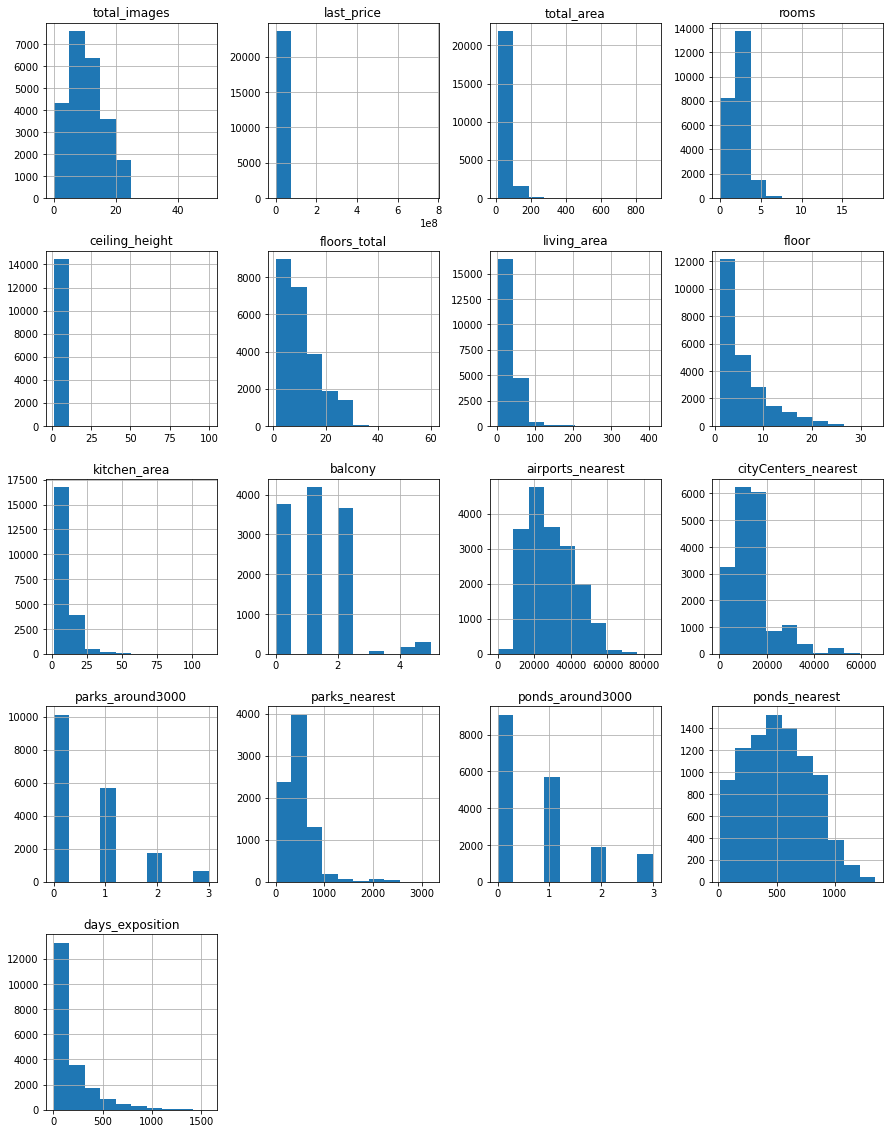

In [4]:
data.hist(figsize=(15, 20))
plt.show();

### Предобработка данных

In [5]:
pd.DataFrame(data.isna().mean()*100).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.799105
floors_total,0.362885
living_area,8.029875
floor,0.000000
is_apartment,88.290645


Пропущенные значения встречены в столбцах:
+ Высота потолков (м) - можно заменить на медианное значение для населенного пункта и кол-ва этажей в доме
+ Кол-во этажей в доме - отсутсвует 86 значений, удаление строк не приведет к серьезному искажению данных
+ Жилая площадь в квадратных метрах (м²) - вычесть из общей площади площадь кухни
+ Апартаменты - если продавец не указал, что продает апартаменты, скорее всего это обычная квартира
+ Площадь кухни в квадратных метрах (м²) - вычесть из общей площади жилую площадь
+ Число балконов - если продавец не указал количество балконов, скорее всего их нет в квартире
+ Название населённого пункта - отсутсвует 49 значений, удаление строк не приведет к серьезному искажению данных
+ Расстояние до ближайшего аэропорта в метрах (м) - можно заменить на среднее значение для населенного пункта
+ Расстояние до центра города (м) - можно заменить на среднее значение для населенного пункта
+ Число парков в радиусе 3 км
+ Расстояние до ближайшего парка (м) - можно заменить на среднее значение для населенного пункта
+ Число водоёмов в радиусе 3 км
+ Расстояние до ближайшего водоёма (м) - можно заменить на среднее значение для населенного пункта

Поиск неявных дубликатов в столбце с названиями населенных пунктов:

In [6]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Отсутсвие названия населенного пункта критично и неозможно восстановить, однако, отсутсвует всего 49 значений, удаление строк не приведет к серьезному искажению данных.
Аналогично для количества этажей в доме.
В списке населенных пунктов встречаются одинаковые названия, отличающиеся буквами е и ё, 


In [7]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data = data.dropna(subset=['days_exposition']).reset_index(drop=True)
#data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data = data.apply(lambda x: x.replace({'поселок':'посёлок',
                                       'городской посёлок': 'посёлок',
                                       'посёлок городского типа': 'посёлок',
                                       'коттеджный посёлок': 'посёлок',
                                       'посёлок при железнодорожной станции': 'посёлок станции'
                                      }, regex=True))

Отсутвующие данных о высоте потолков можно заменить на медианное значение для населенного пункта и многоэтажности дома. Так как скорее всего дома в каждом определенном населенном пункте однотипные.

In [8]:
data['ceiling_height'] = (data.groupby(['locality_name', 'floors_total'])['ceiling_height']
                          .apply(lambda x: x.fillna(x.median())))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Если продавец не указал число балконов, то, скорее всего, в его квартире их нет.

In [9]:
data['balcony'] = data['balcony'].fillna(0)

Отсутствующие значения в столбцах с картографическими данными заменим на среднее значение по населенному пункту. В данном случае, мне кажется, среднее значение будет лучше медианного, так как при неравномерном распределении квартир по площади населенного пункта, среднее значение будет ближе к реальному, особенно, если рассматриваемая квартира находится вдалеке от большинства других.

In [10]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == t), 'airports_nearest'].mean()

In [11]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    data.loc[(data['locality_name'] == t), 'cityCenters_nearest'].mean()

In [12]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
    data.loc[(data['locality_name'] == t), 'parks_nearest'].mean()

In [13]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
    data.loc[(data['locality_name'] == t), 'ponds_nearest'].mean()

In [14]:

data['living_area'] = data['living_area'].fillna(data['total_area']-data['kitchen_area'])
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']-data['living_area'])

Поиск аномальных значений.

In [15]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,20394.000000,2.039400e+04,20394.000000,20394.000000,20394.00000,20394.000000,19075.000000,20394.000000,19075.000000,20394.000000,15789.000000,15789.000000,15757.000000,15279.000000,15757.000000,15712.000000,20394.000000
mean,9.631362,6.263722e+06,58.834265,2.024370,2.72852,10.863293,33.903861,5.973767,10.693782,0.594440,28841.010724,14298.019324,0.600558,492.525313,0.759853,523.223012,180.741395
std,5.658712,1.088858e+07,34.066200,1.055162,0.99195,6.649703,21.924351,4.931607,6.569166,0.950411,12693.718469,8567.928124,0.797699,232.042925,0.932315,196.398706,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.00000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,39.500000,1.000000,2.55000,5.000000,18.400000,2.000000,7.000000,0.000000,18498.000000,9488.000000,0.000000,451.000000,0.000000,485.000000,45.000000
50%,9.000000,4.500000e+06,50.800000,2.000000,2.65000,9.000000,30.000000,4.000000,9.200000,0.000000,26856.000000,13151.000000,0.000000,499.064751,0.000000,523.191110,95.000000
75%,14.000000,6.500000e+06,67.800000,3.000000,2.75000,16.000000,42.000000,8.000000,12.000000,1.000000,37407.000000,16364.000000,1.000000,499.064751,1.000000,564.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.00000,60.000000,460.000000,33.000000,230.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Максимальная высота потолков 100 метров, а минимальная 1 метр - что-то здесь не чисто, надо изучить поподробнее. В России минимальная высота потолков 2.4 метра.
Минимальное количество комнат 0 - такого не может быть (ну хоть одна)
Минимальная жилая площадь 2 кв.метра - тоже что-то напутали
Минимальное расстояние до аэропорта 0 - хорошо конечно, но все же

<AxesSubplot:>

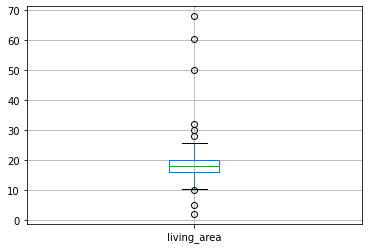

In [16]:
data.query('rooms == 0').boxplot(column='living_area')

Кол-во комнат равное 0 встречается в основном в квартирах с маленький жилой площадью, поэтому скорее всего в таких квартирах всего одна комната.

In [17]:
data['rooms'] = data['rooms'].replace(0,1)
data.loc[data['rooms'] == 0]['rooms'].count()

0

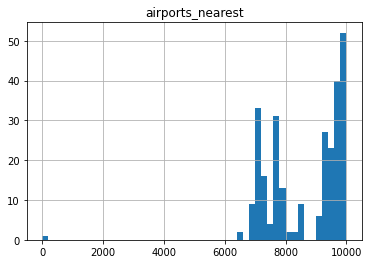

In [18]:
data.hist(column='airports_nearest', bins=50, range =(0,10000))
plt.show();

Маленькое расстояние до аэропорта - ошибка. Значения до 6000 в целом осутствуют.

На всякий случай изучим строку с общей площадью квартиры 900 кв. метров. Строка выглядит правдоподобно. Кому-то очень повезло.

In [19]:
data.query('total_area == 900')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16839,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,0.0,Санкт-Петербург,30706.0,7877.0,0.0,499.064751,2.0,318.0,106.0


Избавляемся от неправдоподобно больших значений высоты потолков. Разделим на 10, так как скорее всего проддавец ошибся при введении данных.

In [20]:
data['ceiling_height'].unique()

array([  2.65 ,   2.6  ,   3.03 ,   2.625,   2.5  ,   2.67 ,   2.545,
         2.55 ,   2.56 ,   2.7  ,   3.05 ,   2.75 ,   3.   ,   2.9  ,
         2.8  ,   3.2  ,   2.52 ,   3.19 ,   3.25 ,   3.45 ,   2.77 ,
         2.85 ,   2.64 ,   2.57 ,   4.15 ,   3.5  ,   3.3  ,   2.47 ,
         2.73 ,   2.84 ,   3.1  ,   2.34 ,   2.755,   3.4  ,   2.725,
         3.06 ,   2.72 ,   2.54 ,   2.51 ,   2.78 ,   2.65 ,   2.76 ,
        25.   ,   2.58 ,   3.7  ,  27.   ,   2.59 ,   5.2  ,   2.575,
         2.745,   2.87 ,   2.66 ,   2.   ,   2.775,   2.525,   2.92 ,
         3.11 ,   3.13 ,   2.735,   2.675,   3.8  ,   3.15 ,   3.6  ,
         3.55 ,   3.16 ,   3.12 ,   2.53 ,   2.74 ,   2.96 ,   2.46 ,
         2.595,   5.   ,   2.45 ,   2.79 ,   4.   ,   2.95 ,   4.06 ,
         3.82 ,   3.53 ,   2.83 ,   4.7  ,   3.38 ,   5.6  ,   3.65 ,
         3.9  ,   2.71 ,   3.35 ,   2.3  ,   3.01 ,   2.48 ,   2.62 ,
         3.57 ,   2.82 ,   3.98 ,   2.63 ,   3.83 ,   3.95 ,   2.4  ,
         2.88 ,   3.

In [21]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x>20 else x)

Очистка даннных от аномальных значений

In [22]:
data = data.query('living_area>8 and ceiling_height > 2.4 and ~(airports_nearest==0)')

Приведение значений столбца "Апартаменты" к булевому типу

In [23]:
try:
    data['is_apartment'] = data['is_apartment'].astype(bool)
except:
    pass

Проверяем если в данных явные дубликаты:

In [24]:
data.duplicated().sum()

0

Смотрим на результат очистки даннных от пропущенных значений:

In [25]:
pd.DataFrame(data.isna().mean()*100).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,0.000000


Пустые значения остались в столбцах с картографическими данными. Их количество уменьшилось, но заполнить все пропуски не представляется возможным, так как не хватает такого типа данных по населенным пунктам.

Изменение типа данных в столбцах в соответствии с пунктом 1.1

In [26]:

try:
    data['floors_total'] = data['floors_total'].astype(int)
except:
    pass
try:
    data['ponds_around3000'] = data['ponds_around3000'].astype(int)
except:
    pass
try:
    data['days_exposition'] = data['days_exposition'].astype(int)
except:
    pass

try:
    data['parks_around3000'] = data['parks_around3000'].astype(int)
except:
    pass

try:
    data['balcony'] = data['balcony'].astype(int)
except:
    pass

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                  int64
dtype: object

#### Вывод

На первом и втором этапах было проанализировано качество исходных данных. Данные представляют собой архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. 
Процесс предобработки данных включал удаление пропусков, поиск неявных дубликатов, приобразование типов столбцов.
+ Пропуски были удалены в столбцах ceiling_height, floors_total, living_area, kitchen_area, balcony, locality_name, days_exposition.
+ Пропуски в столбцах с картографическими данными (airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest) заполнены насколько это возможно. Заполнить все пропуски не представляется возможным, так как не хватает такого типа данных по населенным пунктам.
+ В столбце с данными о населенных пунктах был проведен поиск неявных дубликов и затем они были ликвидированы
+ Столбцы floors_total, parks_around3000, balcony, ponds_around3000, days_exposition  были приведены к целочисленным
+ Столбец first_day_exposition переведен в формат времени
+ Значения столбца переведны в значения булевого типа

Возможные причины появления пропусков можно разделить на зависящие от человеческого или технического факторов. Пропуски в пользовательских данных скорее всего относятся к человечкому фактору: продавец невнимально или неполностью заполнил объявление. Технический фактор появления пропусков скорее всего имеет место быть для картографических данных - могли произойти ошибки при выгрузке данных.

### Посчитайте и добавьте в таблицу новые столбцы

In [27]:
data['price_square_meter'] = data['last_price']/data['total_area']
data['cityCenter_km']=round(data['cityCenters_nearest']/1000)
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [28]:
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(categorize_floor, axis=1)

#### Вывод

На третьем этапе в таблицу были добавлены новые данные, включающие цену за квадратный метр(price_square_meter), расстояние от центра населенного пункта до квартиры в км (cityCenter_km), день публикации объявления (weekday), месяц публикации объявления (month), год публикации объявления (year), тип этажа квартиры (floor_type).

### Проведите исследовательский анализ данных

Распределение значений для основных параметров:

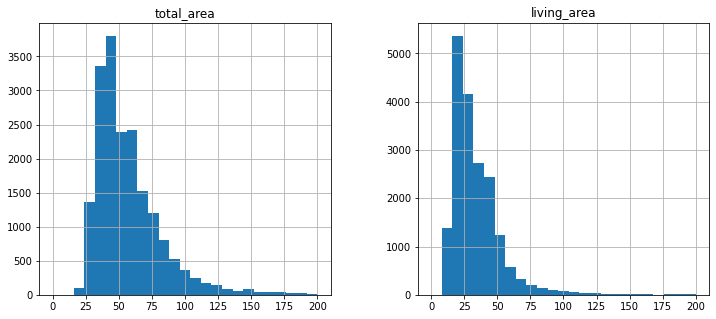

In [29]:
data.hist(column=['total_area', 'living_area'], bins=25, range=(0, 200), figsize=(12,5))
plt.show();

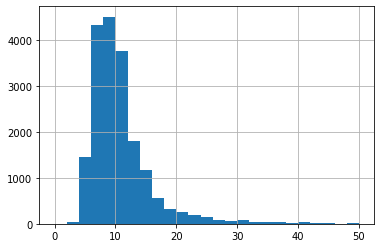

In [30]:
data['kitchen_area'].hist(bins=25, range=(0, 50))
plt.show();

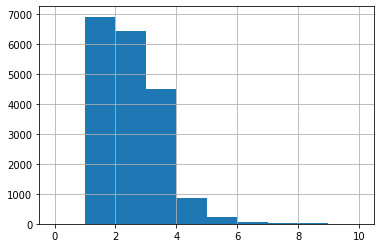

In [31]:
data['rooms'].hist(bins=10, range=(0,10))
plt.show();

Общая площадь квартир, жилая площадь и площадь кухни, количество комнат имеют схожую картину распределения значений. В таблице большинство объявлений о продаже квартир с небольшой площадью.

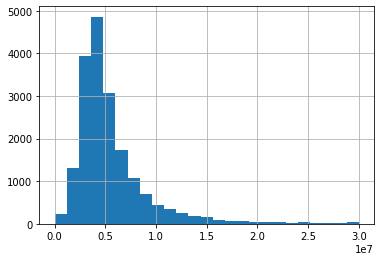

In [32]:
data['last_price'].hist(bins=25, range=(0,30000000))
plt.show();

Расределение цен на квартиры очень похоже на распределение их общей площади. Можно предположить, что между ними есть высокая степень корреляции - чем больше площадь квартиры, тем выше ее цена. Это предположение будет проверено ниже.

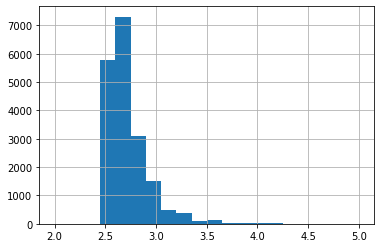

In [33]:
data['ceiling_height'].hist(bins=20, range=(2,5))
plt.show();

В большинстве объявлений квартиры с классической высотой потолков.

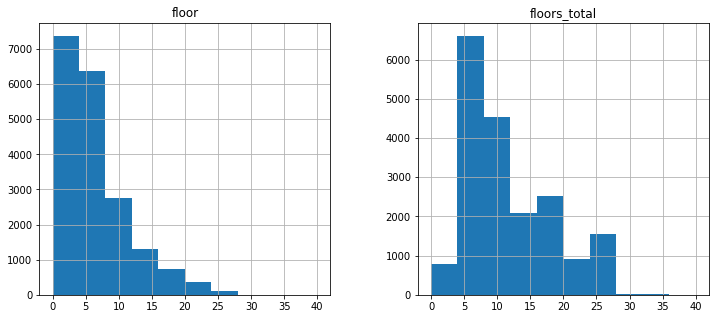

In [34]:
data.hist(column=['floor', 'floors_total'], bins=10, range=(0, 40), figsize=(12,5))
plt.show();

Большинство объявлений о продаже квартир на нижних этажах.

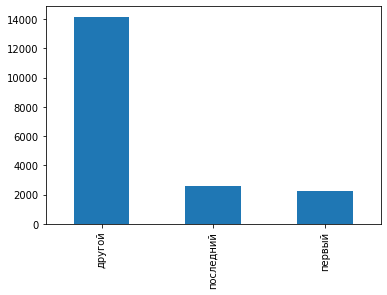

In [35]:
data['floor_type'].value_counts().plot(kind='bar')
plt.show();

Кол-во объявлений о продаже на первом и последнем этажах примерно одинаковое. Большинство квартир продается не на первых и не на последних этажах.

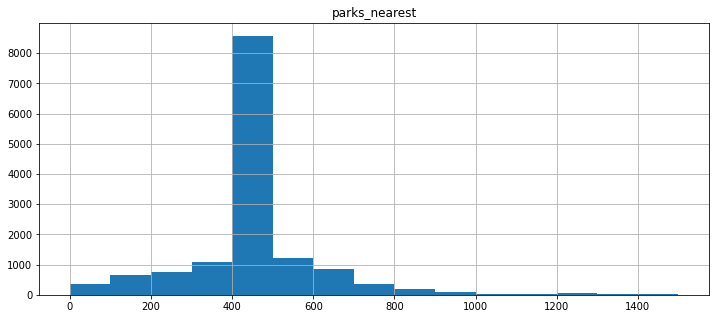

In [36]:
data.hist(column='parks_nearest', bins=15, range=(0, 1500), figsize=(12,5))
plt.show();

Большая часть квартир находится в 500 метрах от парковых зон.

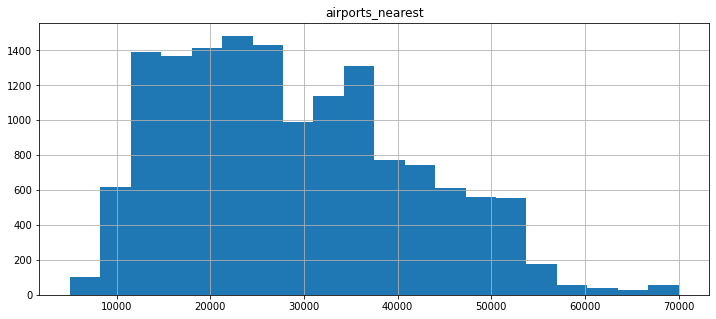

In [37]:
data.hist(column='airports_nearest', bins=20, range=(5000, 70000), figsize=(12,5))
plt.show();

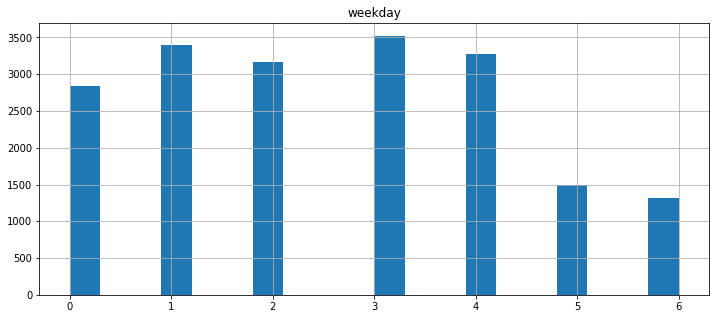

In [38]:
data.hist(column='weekday', bins=20, figsize=(12,5))
plt.show();

Больше всего объявлений были опубликованы в будние дни.

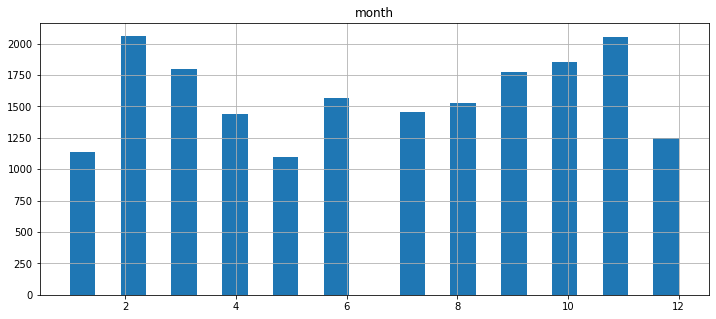

In [39]:
data.hist(column='month', bins=24, figsize=(12,5))
plt.show();

Больше всего объявлений было опубликованы в конце феврале и в ноябре. Летом наблюдается спад объявлений о продаже квартир.

Пользовательские характеристики описываются явным Пуассоновским распределением - наибольшее количество квартир имеет небольшую площадь, расположено на невысоких этажах, имеет стандартную минимальную высоту потолков и так далее.
Картографические характеристики описываются нормальным распределением.

Среднее кол-во дней жизни объявления до продажи: 184.85401229702035
Медианное кол-во дней жизни объявления до продажи: 101.0


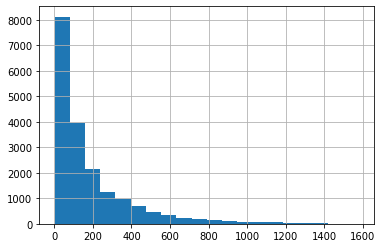

In [40]:
data['days_exposition'].hist(bins=20)
print('Среднее кол-во дней жизни объявления до продажи:', data['days_exposition'].mean())
print('Медианное кол-во дней жизни объявления до продажи:', data['days_exposition'].median())

count    19029.000000
mean       184.854012
std        221.976949
min          1.000000
25%         44.000000
50%        101.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

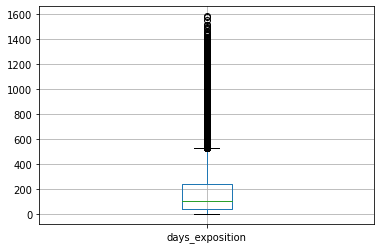

In [41]:
data.boxplot(column='days_exposition')
data['days_exposition'].describe()

Большинство значений лежит в диапазоне до 238 дней. Продажи более 600 дней попадают в зону выбросов на графике. Долгими можно считать продажи больше 238 дней. Очень быстрыми можно считать продажи до 1-го квартиля, квартиры раскупались буквально за месяц

In [42]:
# (
#     data.query('days_exposition > 365')
#     .pivot_table(index='locality_name', values='days_exposition', aggfunc='count')
#     .sort_values(by='days_exposition', ascending=False)
# )

Долгими продажами можно считать продажи длящиееся больше года, больше всего таких объявлений в Санкт-Петербурге.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта

Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

In [43]:
median_price_locality = data.pivot_table(index='locality_name',
                                         values='price_square_meter',
                                         aggfunc=['median', 'count'])
median_price_locality.columns = ['median_price', 'count']
median_price_locality.sort_values(by='count', ascending=False).head(10)

,median_price,count
locality_name,,
Санкт-Петербург,103000.000000,12786
посёлок Мурино,86365.044446,506
посёлок Шушары,76625.586854,378
Всеволожск,65789.473684,314
Колпино,73913.043478,297
Пушкин,98039.215686,285
посёлок Парголово,91387.362637,278
деревня Кудрово,92297.899427,267
Гатчина,67187.500000,257


In [44]:
print('Самая низкая стоимость квадратного метра в', median_price_locality['median_price'].idxmin(), ':', median_price_locality['median_price'].min())
print('Самая высокая стоимость квадратного метра в', median_price_locality['median_price'].idxmax(), ':', median_price_locality['median_price'].max())

Самая низкая стоимость квадратного метра в деревня Старополье : 10368.663594470047
Самая высокая стоимость квадратного метра в деревня Бор : 105539.26157046281


In [45]:
data.query('locality_name == "деревня Бор"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,cityCenter_km,weekday,month,year,floor_type
10154,1,20295200.0,192.3,2018-02-13,6,2.95,2,147.2,1,False,...,NaN,NaN,NaN,162,105539.26157,NaN,1,2,2018,первый


Коэффициент корреляции общей площади квартиры и полной стоимости: 0.636562467977921
Коэффициент корреляции жилой площади квартиры и полной стоимости: 0.5638716366487019
Коэффициент корреляции площади кухни и полной стоимости: 0.4863144802563863
Коэффициент корреляции количества комнат в квартире и полной стоимости: 0.35659314032732997


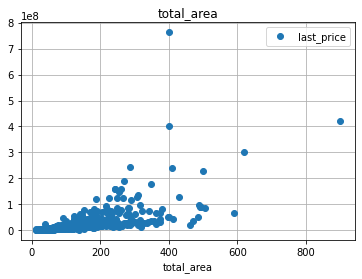

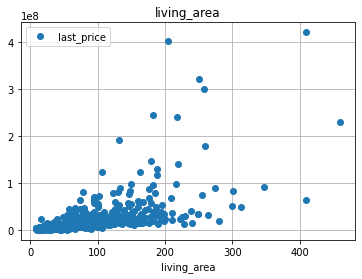

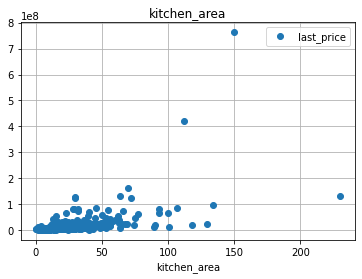

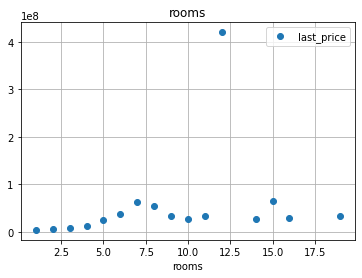

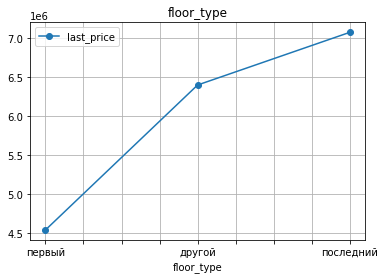

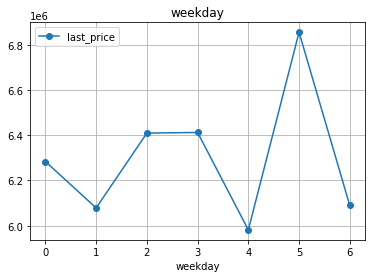

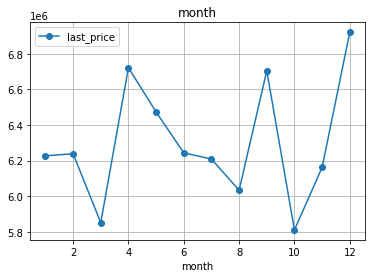

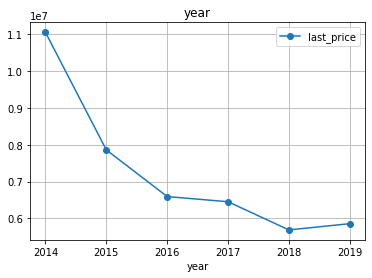

In [46]:
(
    data
    .pivot_table(index='total_area', values='last_price')
    .plot(style='o', title='total_area', grid = True)
)
print('Коэффициент корреляции общей площади квартиры и полной стоимости:', data['total_area'].corr(data['last_price']))
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(style='o', title='living_area', grid = True)
)
print('Коэффициент корреляции жилой площади квартиры и полной стоимости:', data['living_area'].corr(data['last_price']))
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(style='o', title='kitchen_area', grid = True)
)
print('Коэффициент корреляции площади кухни и полной стоимости:', data['kitchen_area'].corr(data['last_price']))
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(style='o', title='rooms', grid = True)
)
print('Коэффициент корреляции количества комнат в квартире и полной стоимости:', data['rooms'].corr(data['last_price']))
(
    data.pivot_table(index='floor_type', values='last_price')
    .sort_values(by='last_price')
    .plot(style='-o', title='floor_type', grid = True)
)
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(style='-o', title='weekday', grid = True)
)
(
    data.pivot_table(index='month', values='last_price')
    .plot(style='-o', title='month', grid = True)
)
(
    data.pivot_table(index='year', values='last_price')
    .plot(style='-o', title='year', grid = True)
)
plt.show();

Построены зависимости стоимости квартир на момент снятия с публикации от различных параметров. Коэффициен корреляции посчитан для количественных данных.
Сделаны следующие наблюдения:
1. Наблюдается рост цены за квартиру прямо пропорционально размеру ее площади - коэффициент корреляции 0.64. Однако, на рост цены влияет множество других фактов, которые снижают значимость размера квартиры. Аналогичная картина для зависимости цены от кол-ва комнат, так как количество комнат непосредственно связано с размером квартиры.
2. Квартиры на верхних этажах дороже, чем на первом. Чем выше этаж, тем дороже можно продать квартиру.
3. Выгоднее всего продавать квартиры по субботам, в апреле, сентябре или декабре
4. С каждым годом недвижимость дешевела, и с 2014 по 2019 год цены на недвижимость упали почти в 2 раза, что связано с падением площади квартир (проверено ниже)

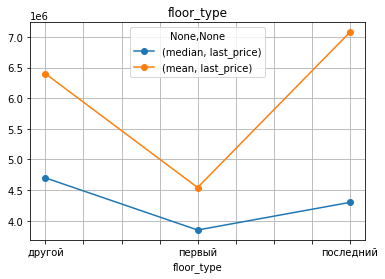

In [47]:
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc=['median', 'mean'])
    .plot(style='-o', title='floor_type', grid = True)
)
plt.show();

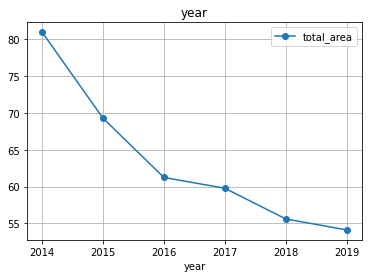

In [48]:
(
    data.pivot_table(index='year', values='total_area')
    .plot(style='-o', title='year', grid = True)
)
plt.show();

График зависимости цены за квадратный метр при удалении от центра для Санкт-Петербурга:

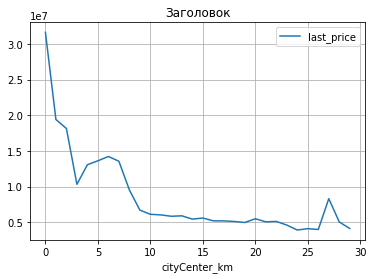

In [49]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenter_km', values='last_price')
    .plot(title = 'Заголовок', grid = True)
);

Построен график средней цены на каждый километр удаления от центра. 
По мере удаления от центра населенного пункта цена на квартиры уменьшается. Особенно резкое падание наблюдается первые 5 км, потом наклон графика падения цены намного меньше. 

#### Вывод

На последне этапе были проанализированы существующие зависимости между данными. 
- Построены гистограмы для всех основных парметров из объявлений о продаже квартир.Пользовательские характеристики описываются явным Пуассоновским распределением - наибольшее количество квартир имеет небольшую площадь, расположено на невысоких этажах, имеет стандартную минимальную высоту потолков и так далее.Картографические характеристики описываются нормальным распределением.
- Построены корреляции между ценой на квартиры и основными параметрами. Рассчитаны коэффициенты корреляции между количественными характеристиками. Цена зависит от площади квартиры, ее этажности, а также день и месяц играют важную роль в успешной продаже квартиры

### Общий вывод

В работе будет произведено исследование данных сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Этап 1 и 2.

На первом и втором этапах было проанализировано качество исходных данных. Данные представляют собой архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. 
Пропущенные значения были встречены в столбцах:
+ Высота потолков (м) - заменено на медианное значение для населенного пункта и кол-ва этажей в доме
+ Кол-во этажей в доме - отсутсвует 86 значений, удаление строк не приведет к серьезному искажению данных
+ Жилая площадь в квадратных метрах (м²) - вычесть из общей площади площадь кухни
+ Апартаменты - если продавец не указал, что продает апартаменты, скорее всего это обычная квартира
+ Площадь кухни в квадратных метрах (м²) - вычесть из общей площади жилую площадь
+ Число балконов - если продавец не указал количество балконов, скорее всего их нет в квартире
+ Название населённого пункта - отсутсвует 49 значений, удаление строк не приведет к серьезному искажению данных
+ Расстояние до ближайшего аэропорта в метрах (м) - заменено на среднее значение для населенного пункта
+ Расстояние до центра города (м) - заменено на среднее значение для населенного пункта
+ Число парков в радиусе 3 км - заменено на среднее значение для населенного пункта
+ Расстояние до ближайшего парка (м) - заменено на среднее значение для населенного пункта
+ Число водоёмов в радиусе 3 км - заменено на среднее значение для населенного пункта
+ Расстояние до ближайшего водоёма (м) - заменено на среднее значение для населенного пункта

Процесс предобработки данных включал удаление пропусков, поиск явных и неявных дубликатов, приобразование типов столбцов.
+ Пропуски были удалены в столбцах ceiling_height, floors_total, living_area, kitchen_area, balcony, locality_name, days_exposition.
+ Пропуски в столбцах с картографическими данными (airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest) заполнены насколько это возможно. Заполнить все пропуски не представляется возможным, так как не хватает такого типа данных по населенным пунктам.
+ В столбце с данными о населенных пунктах был проведен поиск неявных дубликов и затем они были ликвидированы
+ Столбцы floors_total, parks_around3000, balcony, ponds_around3000, days_exposition  были приведены к целочисленным
+ Столбец first_day_exposition переведен в формат времени
+ Значения столбца переведны в значения булевого типа

Возможные причины появления пропусков можно разделить на зависящие от человеческого или технического факторов. Пропуски в пользовательских данных скорее всего относятся к человечкому фактору: продавец невнимально или неполностью заполнил объявление. Технический фактор появления пропусков скорее всего имеет место быть для картографических данных - могли произойти ошибки при выгрузке данных.

Этап 3.

На третьем этапе в таблицу были добавлены новые данные, включающие цену за квадратный метр(price_square_meter), расстояние от центра населенного пункта до квартиры в км (cityCenter_km), день публикации объявления (weekday), месяц публикации объявления (month), год публикации объявления (year), тип этажа квартиры (floor_type).

Этап 4.

На последнем этапе были проанализированы существующие зависимости между данными. Построены гистограмыы для всех основных парметров из объявлений о продаже квартир. Рассчитаны коэффициенты корреляции между количественными характеристиками.

Построены гистограмы для всех основных парметров из объявлений о продаже квартир. Пользовательские характеристики описываются явным Пуассоновским распределением - наибольшее количество квартир имеет небольшую площадь, расположено на невысоких этажах, имеет стандартную минимальную высоту потолков и так далее.Картографические характеристики описываются нормальным распределением.

Кол-во объявлений о продаже на первом и последнем этажах примерно одинаковое. Большинство квартир продается не на первых и не на последних этажах. Однако, квартиры на верхних этажах дороже, чем на первом. Чем выше этаж, тем дороже можно продать квартиру.

Большинство продаж квартир совершалось в диапазоне до 238 дней. Долгими можно считать продажи больше 238 дней. Очень быстрыми можно считать, когда квартиры раскупались буквально за месяц.

По мере удаления от центра Санкт-Петербурга цена на квартиры уменьшается. Особенно резкое падание наблюдается первые 5 км, потом наклон графика падения цены намного меньше. Самые дорогие квартиры в центре.

- Самая низкая стоимость квадратного метра в деревне Старополье
- Самая высокая стоимость квадратного метра в деревне Бор

Построены зависимости стоимости квартир на момент снятия с публикации от различных параметров. Коэффициент корреляции посчитан для количественных данных.

- Наблюдается рост цены за квартиру прямо пропорционально размеру ее площади. Однако, на рост цены влияет множество других фактов, которые снижают значимость размера квартиры. Аналогичная картина а зависимости цены от кол-ва комнат, так как количество комнат непосредственно связано с размером квартиры.

- Больше всего объявлений были опубликованы в будние дни. При этом больше всего продаж совешается в субботу.

- Больше всего объявлений было опубликованы в конце феврале и в ноябре. Летом наблюдается спад объявлений о продаже квартир. Онако больше всего продаж совершается в апреле, сентябре или декабре.
 
- С каждым годом недвижимость дешевела, и с 2014 по 2019 год цены на недвижимость упали почти в 2 раза, что связано с падением средней площади продаваемой квартииры.

- Цена зависит от площади квартиры, ее этажности, а также день и месяц играют важную роль в успешной продаже квартиры

